In [1]:
#vamos definir um "passo a passo para treinar esse modelo"
#obs: primeiro, vamos interpretar como um problema de classificação entre 6 classes, sendo assim o modelo tera saida 6
#1 - carregar e relacionar dados: obiviamente precisamos entender o tipo de dado que estamos lidando, e relacionar as imagens
#com seus respectivos labels que estao numa tabela csv
#1.2 - vizualização de dados: apos relacionar, vamos vizualizar as imagens e seus labels e talvez alguns outros fatores

#obs: em captcha_data temos um csv com o caminho da imagem e seu label

In [3]:
import os
import pandas as pd
import numpy as np

In [4]:
#primeiro vamos dar uma olhada no csv
#coloquei em string pra n apagar os 0's a esquerda
df_labels = pd.read_csv("CaptchaDataSet\captcha_data.csv", sep = ',', dtype={'solution': str})

In [5]:
df_labels.isnull().sum()

image_path    0
solution      0
dtype: int64

In [6]:
df_labels

,image_path,solution
0,train-images/image_train_1.png,000073
1,train-images/image_train_2.png,000372
2,train-images/image_train_3.png,000454
3,train-images/image_train_4.png,000634
4,train-images/image_train_5.png,000716
...,...,...
9995,test-images/image_test_1996.png,996986
9996,test-images/image_test_1997.png,998908
9997,test-images/image_test_1998.png,999209
9998,test-images/image_test_1999.png,999922


In [7]:
#como sabemos que a resposta esta na ordem das imagens so precisamos separar as soluções para treino, teste e validação
#vamos verificar o tamanho de cada dataset
dataTreino = 'CaptchaDataSet/train-images/train-images'
dataTeste = 'CaptchaDataSet/test-images/test-images'
dataValidacao = 'CaptchaDataSet/validation-images/validation-images'

In [8]:
print(len(os.listdir(dataTreino)))
print(len(os.listdir(dataTeste)))
print(len(os.listdir(dataValidacao)))

6000
2000
2000


In [10]:
#agora sabemos a quantidade mas vamos manter o nome dos arquivos
labelTreino = df_labels.iloc[0: 6000  , :].reset_index(drop = True)
labelValidacao = df_labels.iloc[6000: 8000  , :].reset_index(drop = True)
labelTeste = df_labels.iloc[8000:   , :].reset_index(drop = True)

In [11]:
#antes de fazer dataArgumentation, vamos carregar e vizualizar algumas imagens usando a lib os

In [12]:
import cv2
import matplotlib.pyplot as plt
from natsort import natsorted
import random


def plotarData(data, labels, titulo):
    plt.figure(figsize = (8,4))
    plt.suptitle(titulo, fontsize=11)
    for i in range(10):
        #usamos esse natsorted para ficar na ordem igual do csv e do arquivo
        number = random.randint(0, 100)

        imagem = natsorted(os.listdir(data))[number]

        caminhoimagem = os.path.join(data, imagem )

        ax = plt.subplot(5,5, i + 1)
        imgCv2 = cv2.imread(caminhoimagem)
        plt.imshow(imgCv2)
        plt.axis('off') 
        plt.title(labels.iloc[number, 1])

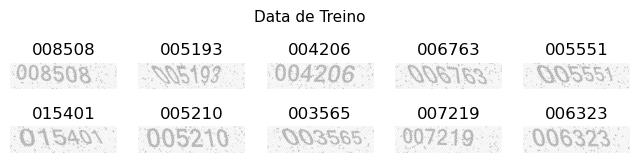

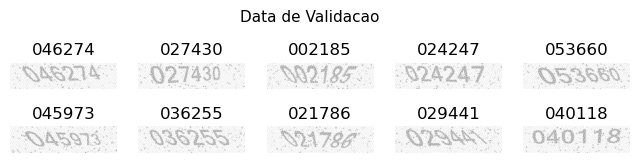

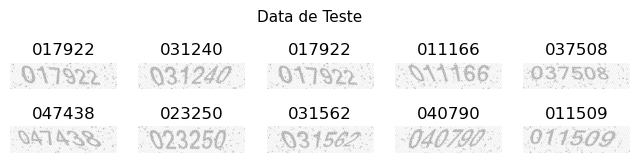

In [13]:
plotarData(dataTreino, labelTreino, "Data de Treino")
plotarData(dataValidacao, labelValidacao, "Data de Validacao")
plotarData(dataTeste, labelTeste, "Data de Teste")

In [14]:
#na vdd nao vamos tratar os dados usando imageDataGenerator, vamos transformar em array numpy ambos X e Y, 
#vamos transformar Y em one hot enconder, ou seja um vetor com 6 dimensoes de 0 a 9

In [15]:
#imagens para numpyarray:
def diretorioToNp(data):
    #cria arraynumpy preenchido com 0 em escala cinza
    n_sample = len(os.listdir(data))
    X = np.zeros((n_sample, 50, 200, 1))
    
    for i, nomeArquivo in enumerate(natsorted(os.listdir(data))):

        caminhoimagem = os.path.join(data, nomeArquivo)
        imgCv2 = cv2.imread(caminhoimagem, cv2.IMREAD_GRAYSCALE)
        imgCv2 = imgCv2 / 255.0
        imgCv2 = np.reshape(imgCv2, (50, 200, 1))
        X[i] = imgCv2
        
    return X

xTreino = diretorioToNp(dataTreino)
xValidacao = diretorioToNp(dataValidacao)
xTeste = diretorioToNp(dataTeste)
    
    
    
    

In [14]:
#agora vamos transformar Y em arraynumpy em vez de string, e depois onehot.
#precisamos transformar o numeros dos labels em arrays com numeros separados
def preprocess_solution(solution):
    return np.array([int(char) for char in solution], dtype=np.int64)

#precisamos transformar a coluna de solução em um array
ytreino= labelTreino['solution'].apply(preprocess_solution).values
yValidacao = labelValidacao['solution'].apply(preprocess_solution).values
yTeste = labelTeste['solution'].apply(preprocess_solution).values

ytreino = np.vstack(ytreino)
yValidacao = np.vstack(yValidacao)
yTeste = np.vstack(yTeste)



[7 8 0 0 7 8]


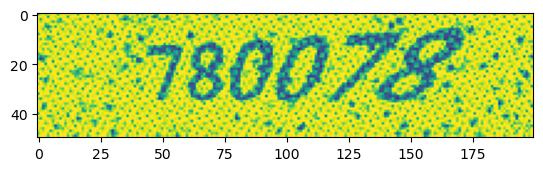

In [15]:
import random
number = random.randint(0, 6000)
plt.imshow(xTreino[number])
print(ytreino[number])

In [16]:
from sklearn.preprocessing import OneHotEncoder

#bem intuitivo ate
def onehotEnconder(datalabel):
    n_predictions, n_features = datalabel.shape


    datalabel = datalabel.flatten().reshape(-1, 1)
    encoder = OneHotEncoder(sparse_output=False)
    datalabel = encoder.fit_transform(datalabel)

    n_categories = datalabel.shape[1]
    
    datalabel = datalabel.reshape(n_predictions, n_features, n_categories)
    
    return datalabel

ytreino = onehotEnconder(ytreino)
yValidacao = onehotEnconder(yValidacao)
yTeste = onehotEnconder(yTeste)


In [17]:
ytreino[0]

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]])

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten
from tensorflow.keras.layers import Conv2D,MaxPooling2D, Reshape
from tensorflow.keras.optimizers import Adam
from keras.layers import BatchNormalization

In [19]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(50,200,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))


model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))

#testando sem onehot
model.add(Dense(6 * 10 , activation='softmax'))  # Flattened output
model.add(Reshape((6, 10)))

learning_rate = 0.001
optimizer = Adam(learning_rate=learning_rate)


model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

C:\Users\Juan\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 48, 198, 32)         │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 24, 99, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 24, 99, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 24, 99, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 22, 97, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 11, 48, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 11, 48, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 11, 48, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 9, 46, 64)           │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 23, 64)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 4, 23, 64)           │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 4, 23, 64)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 5888)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         753,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 60)                  │           7,740 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, 6, 10)               │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 817,916 (3.12 MB)

 Trainable params: 817,596 (3.12 MB)

 Non-trainable params: 320 (1.25 KB)

None


In [20]:
total_train_samples = 6000  
total_validation_samples = 2000     
batch_size = 256

history2 = model.fit(
    x = xTreino,
    y = ytreino,
    batch_size= batch_size,
    epochs=65,  
    steps_per_epoch=total_train_samples // batch_size,
    validation_data= (xValidacao, yValidacao) ,
    validation_steps=total_validation_samples // batch_size,

)

Epoch 1/65
23/23 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.1185 - loss: 2.4780 - val_accuracy: 0.0860 - val_loss: 2.5198
Epoch 2/65
 1/23 ━━━━━━━━━━━━━━━━━━━━ 16s 763ms/step - accuracy: 0.1399 - loss: 2.2611

C:\Users\Juan\anaconda3\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.1399 - loss: 2.2611 - val_accuracy: 0.2524 - val_loss: 2.3153
Epoch 3/65
23/23 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.1885 - loss: 2.2019 - val_accuracy: 0.0882 - val_loss: 3.1412
Epoch 4/65
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.2381 - loss: 2.1105 - val_accuracy: 0.2476 - val_loss: 2.6891
Epoch 5/65
23/23 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.2499 - loss: 2.0627 - val_accuracy: 0.0883 - val_loss: 3.8219
Epoch 6/65
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.3289 - loss: 1.8740 - val_accuracy: 0.2492 - val_loss: 3.2875
Epoch 7/65
23/23 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.3351 - loss: 1.8398 - val_accuracy: 0.1063 - val_loss: 4.4303
Epoch 8/65
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.3795 - loss: 1.6844 - val_accuracy: 0.0817 - val_loss: 3.9383
Epoch 9/65
23/23 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.4177 - loss: 1.6105 - val_accuracy: 0.1063 - val_loss: 5.0263

Epoch 53/65
23/23 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.9007 - loss: 0.2873 - val_accuracy: 0.7596 - val_loss: 0.7041
Epoch 54/65
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8824 - loss: 0.3268 - val_accuracy: 0.7099 - val_loss: 0.8969
Epoch 55/65
23/23 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.9020 - loss: 0.2796 - val_accuracy: 0.7567 - val_loss: 0.7393
Epoch 56/65
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9062 - loss: 0.2622 - val_accuracy: 0.7380 - val_loss: 0.8130
Epoch 57/65
23/23 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.9060 - loss: 0.2675 - val_accuracy: 0.8617 - val_loss: 0.4215
Epoch 58/65
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8929 - loss: 0.3171 - val_accuracy: 0.8446 - val_loss: 0.5035
Epoch 59/65
23/23 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.9119 - loss: 0.2508 - val_accuracy: 0.8854 - val_loss: 0.3587
Epoch 60/65
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9062 - loss: 0.2734 - val_accuracy: 0.8486

In [22]:
model.save("redeneural.h5")

In [23]:
evalu = model.evaluate(xTeste, yTeste )
print(evalu)
#loss e acc

63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.9190 - loss: 0.2588
[0.271314799785614, 0.916000247001648]


In [23]:
previsao0 = model.predict(xTeste)

63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step


In [24]:
np.argmax(previsao0[0], axis=1)

array([0, 0, 1, 1, 5, 1], dtype=int64)

In [26]:
previsao0[0]

array([[9.7049183e-01, 3.0239867e-03, 2.7237616e-06, 1.5184177e-06,
        2.3324853e-07, 3.3057501e-09, 1.7131222e-11, 2.9687794e-11,
        8.2385876e-10, 8.5626721e-11],
       [8.5347574e-03, 8.2389497e-06, 4.0991824e-07, 1.4993665e-07,
        2.7783807e-08, 1.6946467e-11, 6.3608077e-08, 8.8243463e-10,
        7.1268889e-09, 6.8655485e-12],
       [7.4037736e-08, 8.8617876e-03, 6.0607297e-09, 4.4950934e-06,
        2.1153091e-05, 1.4936804e-09, 5.0209201e-09, 1.2035564e-07,
        1.1922607e-10, 3.8779681e-11],
       [6.2121245e-07, 7.9069760e-05, 3.5677782e-05, 8.8034460e-07,
        2.9401980e-07, 1.5188325e-09, 8.0505398e-09, 4.8192512e-09,
        4.3532019e-08, 4.5178217e-09],
       [4.2097534e-14, 2.0975848e-11, 1.7342016e-06, 1.0992494e-05,
        5.4660956e-09, 1.9689629e-04, 2.6541457e-07, 2.3913515e-07,
        2.0969536e-10, 1.2082872e-06],
       [3.6518932e-06, 8.6633340e-03, 1.4132957e-09, 5.2879474e-05,
        2.7869669e-09, 1.4991318e-09, 3.3009254e-08, 7.05

In [36]:
np.argmax(yTeste[5], axis=1)

array([0, 0, 5, 4, 9, 1], dtype=int64)

In [ ]:
#posso comparar atraves de plots tb

In [2]:
from keras.models import load_model
model = load_model("./modelos/redeneural.h5")

In [27]:
imagem = np.expand_dims(xTeste[0], axis=0)
previsao = model.predict(imagem)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


In [28]:
previsao

array([[[9.7049195e-01, 3.0239786e-03, 2.7237436e-06, 1.5184179e-06,
         2.3324812e-07, 3.3057503e-09, 1.7131192e-11, 2.9687742e-11,
         8.2386048e-10, 8.5626894e-11],
        [8.5347584e-03, 8.2388806e-06, 4.0991910e-07, 1.4993654e-07,
         2.7783702e-08, 1.6946436e-11, 6.3607956e-08, 8.8242968e-10,
         7.1269173e-09, 6.8655494e-12],
        [7.4038027e-08, 8.8617634e-03, 6.0607306e-09, 4.4951071e-06,
         2.1153133e-05, 1.4936863e-09, 5.0209397e-09, 1.2035518e-07,
         1.1922655e-10, 3.8779834e-11],
        [6.2122018e-07, 7.9069767e-05, 3.5677960e-05, 8.8034221e-07,
         2.9401900e-07, 1.5188240e-09, 8.0505096e-09, 4.8192241e-09,
         4.3531941e-08, 4.5178221e-09],
        [4.2097781e-14, 2.0975931e-11, 1.7342069e-06, 1.0992559e-05,
         5.4661276e-09, 1.9689725e-04, 2.6541559e-07, 2.3913560e-07,
         2.0969577e-10, 1.2082897e-06],
        [3.6519007e-06, 8.6632939e-03, 1.4133040e-09, 5.2879375e-05,
         2.7869780e-09, 1.4991292e-09, 3.

In [30]:
previsao = np.vstack(previsao)
previsao

array([[9.7049195e-01, 3.0239786e-03, 2.7237436e-06, 1.5184179e-06,
        2.3324812e-07, 3.3057503e-09, 1.7131192e-11, 2.9687742e-11,
        8.2386048e-10, 8.5626894e-11],
       [8.5347584e-03, 8.2388806e-06, 4.0991910e-07, 1.4993654e-07,
        2.7783702e-08, 1.6946436e-11, 6.3607956e-08, 8.8242968e-10,
        7.1269173e-09, 6.8655494e-12],
       [7.4038027e-08, 8.8617634e-03, 6.0607306e-09, 4.4951071e-06,
        2.1153133e-05, 1.4936863e-09, 5.0209397e-09, 1.2035518e-07,
        1.1922655e-10, 3.8779834e-11],
       [6.2122018e-07, 7.9069767e-05, 3.5677960e-05, 8.8034221e-07,
        2.9401900e-07, 1.5188240e-09, 8.0505096e-09, 4.8192241e-09,
        4.3531941e-08, 4.5178221e-09],
       [4.2097781e-14, 2.0975931e-11, 1.7342069e-06, 1.0992559e-05,
        5.4661276e-09, 1.9689725e-04, 2.6541559e-07, 2.3913560e-07,
        2.0969577e-10, 1.2082897e-06],
       [3.6519007e-06, 8.6632939e-03, 1.4133040e-09, 5.2879375e-05,
        2.7869780e-09, 1.4991292e-09, 3.3009321e-08, 7.05

In [31]:
np.argmax(previsao, axis=1)

array([0, 0, 1, 1, 5, 1], dtype=int64)